In [17]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
data_from_csv = pd.read_csv("pima-indians-diabetes.csv")

In [19]:
data_from_csv.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [20]:
data_from_csv.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [21]:
cols_to_be_normalized = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [22]:
# https://www.quora.com/What-is-the-meaning-of-min-max-normalization
#  this is min-max normalization 
#  the value range will be 0 - 1 
data_from_csv[cols_to_be_normalized] = data_from_csv[cols_to_be_normalized].apply(lambda x: (x-x.min())/ (x.max()-x.min()))

In [23]:
data_from_csv.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [24]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
gluc_concent = tf.feature_column.numeric_column("Glucose_concentration")
bld_press = tf.feature_column.numeric_column("Blood_pressure")
tri = tf.feature_column.numeric_column("Triceps")
insul = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
pedi = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [25]:
# categorical data를 처리하는 방법을 보여주고 있다. 가장 많이 사용하는 것이 categorical_column_with_vocabulary_list 와 categorical_column_with_hash_bucket
# 이다. hash_bucket_size는 해당 data column에 최대 몇가지 종류의 data가 있을지에 대한 예상값이다
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group",["A","B","C","D"])

In [26]:
assigned_group2 = tf.feature_column.categorical_column_with_hash_bucket("Group",hash_bucket_size=10)

In [29]:
data_from_csv["Age"]

0      50
1      31
2      32
3      21
4      33
5      30
6      26
7      29
8      53
9      54
10     30
11     34
12     57
13     59
14     51
15     32
16     31
17     31
18     33
19     32
20     27
21     50
22     41
23     29
24     51
25     41
26     43
27     22
28     57
29     38
       ..
738    21
739    42
740    48
741    26
742    22
743    45
744    39
745    46
746    27
747    32
748    36
749    50
750    22
751    28
752    25
753    26
754    45
755    37
756    39
757    52
758    26
759    66
760    22
761    43
762    33
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

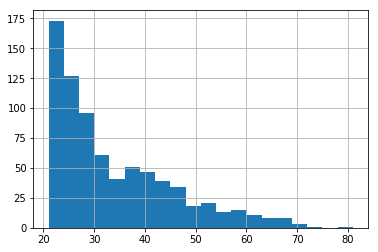

In [33]:
# bins mean how many boundaries uses in the histogram
data_from_csv["Age"].hist(bins=20)

# same results as above
# plt.hist(data_from_csv["Age"],bins=10)

In [35]:
# bucketized_column() takes feature_column obj as 1st argument
bucketized_age = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80,90])

In [36]:
feature_cols = [num_preg,gluc_concent,bld_press,tri,insul,bmi,pedi,assigned_group,bucketized_age]

In [41]:
x_data = data_from_csv.drop("Class",axis=1)

In [44]:
y = data_from_csv["Class"]

In [39]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [40]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33, random_state=42)

In [50]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x= X_train, y= y_train , batch_size=10, num_epochs= 1000, shuffle=True)

In [48]:
model = tf.estimator.LinearClassifier(feature_columns= feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpemyxo1wb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c4230bbe0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### An epoch usually means one iteration over all of the training data. For instance if you have 20,000 images and a batch size of 100 then the epoch should contain 20,000 / 100 = 200 steps. However I usually just set a fixed number of steps like 1000 per epoch even though I have a much larger data set. At the end of the epoch I check the average cost and if it improved I save a checkpoint. There is no difference between steps from one epoch to another. I just treat them as checkpoints.

#### People often shuffle around the data set between epochs. I prefer to use the random.sample function to choose the data to process in my epochs. So say I want to do 1000 steps with a batch size of 32. I will just randomly pick 32,000 samples from the pool of training data.

#### ref) https://stackoverflow.com/a/38340420/3151712

#### A training step is one gradient update. In one step batch_size many examples are processed.

#### An epoch consists of one full cycle through the training data. This is usually many steps. As an example, if you have 2,000 images and use a batch size of 10 an epoch consists of 2,000 images / (10 images / step) = 200 steps.

#### If you choose our training image randomly (and independent) in each step, you normally do not call it epoch. [This is where my answer differs from the previous one. Also see my comment.]

#### ref) https://stackoverflow.com/a/44416034/3151712

In [51]:
model.train(input_fn= train_input_func,steps= 1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpemyxo1wb/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 163.383
INFO:tensorflow:loss = 6.524698, step = 101 (0.612 sec)
INFO:tensorflow:global_step/sec: 289.468
INFO:tensorflow:loss = 6.3655853, step = 201 (0

In [52]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y= y_test, batch_size= 10, num_epochs=1, shuffle=False )

In [53]:
results = model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-11T17:34:56Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpemyxo1wb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-11-17:34:57
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.66141737, auc = 0.7538414, auc_precision_recall = 0.5752216, average_loss = 0.54984623, global_step = 1000, label/mean = 0.33858266, loss = 5.371575, precision = 0.62903225, prediction/mean = 0.34381595, recall = 0.45348838
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/9

In [54]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.66141737,
 'auc': 0.7538414,
 'auc_precision_recall': 0.5752216,
 'average_loss': 0.54984623,
 'label/mean': 0.33858266,
 'loss': 5.371575,
 'precision': 0.62903225,
 'prediction/mean': 0.34381595,
 'recall': 0.45348838,
 'global_step': 1000}

In [59]:
# this is should be different from test input func above, but we used same data for simplicity
# there is no y values for predictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test, batch_size= 10 , num_epochs= 1, shuffle= False)

In [60]:
predictions = model.predict(pred_input_func)

In [61]:
predictions

<generator object EstimatorV2.predict at 0x1a37cf31b0>

In [62]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpemyxo1wb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.2624181], dtype=float32),
  'logistic': array([0.5652306], dtype=float32),
  'probabilities': array([0.43476936, 0.5652306 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.7377222], dtype=float32),
  'logistic': array([0.1496025], dtype=float32),
  'probabilities': array([0.85039747, 0.14960249], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.5078255], dtype=float32),
  'logistic': array([0.18126127], dtype=float32),
  'probabilities': array([0.81873876, 0.18126129], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.44073015], dtype=float32),
  'logistic': array([0.391567], dtype=float32),
  'probabilities': array([0.608433  , 0.39156702], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.18676811], dtype=float32),
  'logistic': ar

## Same job with DNN densily connected neural network
#### densily means all units in L layer are connected all L+1 layer's units 

In [68]:
# when we use DNN, we have change categorical column into embedding_column
embedded_column = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [69]:
# include embedded column
feature_cols = [num_preg,gluc_concent,bld_press,tri,insul,bmi,pedi,embedded_column,bucketized_age]

In [71]:
DNN_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size= 10, num_epochs= 1000, shuffle= False)

In [72]:
# 1st layer has 10 units, 2nd layer has 8 units. so on
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,8,6], feature_columns= feature_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpzdw4qgf1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c43147748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
dnn_model.train(input_fn=DNN_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpzdw4qgf1/model.ckpt.
INFO:tensorflow:loss = 7.5070543, step = 1
INFO:tensorflow:global_step/sec: 166.601
INFO:tensorflow:loss = 7.0872602, step = 101 (0.600 sec)
INFO:tensorflow:global_step/sec: 255.549
INFO:tensorflow:loss = 4.0889583, step = 201 (0.391 sec)
INFO:tensorflow:global_step/sec: 120.841
INFO:tensorflow:loss = 5.8774576, step = 301 (0.829 sec)
INFO:tensorflow:global_step/sec: 271.76
INFO:tensorflow:loss = 6.1805997, step = 401 (0.366 sec)
INFO:tensorflow:global_step/sec: 313.7

In [74]:
DNN_test_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test, y= y_test, batch_size=10, num_epochs= 1, shuffle= False)

In [75]:
DNN_test_results = dnn_model.evaluate(input_fn= DNN_test_input_func, steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-11T19:18:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpzdw4qgf1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-11-19:18:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72047246, accuracy_baseline = 0.66141737, auc = 0.80775887, auc_precision_recall = 0.6517005, average_loss = 0.5287718, global_step = 1000, label/mean = 0.33858266, loss = 5.165694, precision = 0.57009345, prediction/mean = 0.434112, recall = 0.7093023
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/9c/883h376s53500dcqng4b4nj00000gn/T/tmpzdw4qgf1/model.ckpt-1000


In [76]:
DNN_test_results

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.66141737,
 'auc': 0.80775887,
 'auc_precision_recall': 0.6517005,
 'average_loss': 0.5287718,
 'label/mean': 0.33858266,
 'loss': 5.165694,
 'precision': 0.57009345,
 'prediction/mean': 0.434112,
 'recall': 0.7093023,
 'global_step': 1000}